# OCR with Tensor flow

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
mnist = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')
# Separate features (X) and target (y)
X = mnist.drop('label', axis=1)  # Features: all columns except 'label'
y = mnist['label']  # Target: 'label' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (37800, 784)
X_test shape: (4200, 784)
y_train shape: (37800,)
y_test shape: (4200,)


### Step-by-Step Guide to Display an Image

1.  **Select an Image**: Choose a specific image from your dataset .
    
2.  **Reshape the Image**: The MNIST dataset images are typically 28x28 pixels, so you might need to reshape the flat image array into this 2D shape.
    
3.  **Use plt.imshow()**: Display the image using matplotlib.

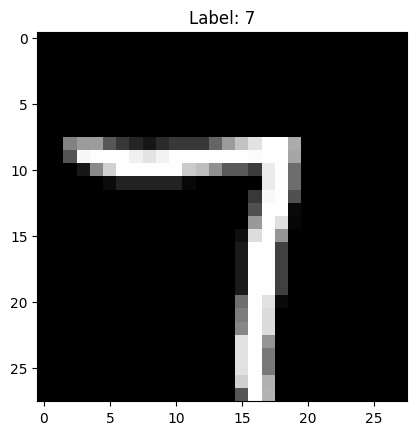

In [36]:
image = X_train.iloc[9].values
# Reshape the image from (784,) to (28, 28)
# print("values::", image)
image = image.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train.iloc[9]}")  # shows the label of the image
plt.show()

# The same can be checked with test dataset

In [66]:
from tensorflow.keras.layers import Dense, Input

# Define the model
model = Sequential([
    Input(shape=(784,)),  # Specify the input shape using Input layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [67]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7702 - loss: 17.0584 - val_accuracy: 0.9017 - val_loss: 1.9952
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9200 - loss: 1.4096 - val_accuracy: 0.9147 - val_loss: 1.3680
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9382 - loss: 0.6884 - val_accuracy: 0.9139 - val_loss: 1.1514
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9488 - loss: 0.4471 - val_accuracy: 0.9328 - val_loss: 0.7759
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9583 - loss: 0.2975 - val_accuracy: 0.9328 - val_loss: 0.7401
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9579 - loss: 0.2438 - val_accuracy: 0.9339 - val_loss: 0.6793
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9639 - loss: 0.2104 - val_accuracy: 0.9358 - val_loss: 0.6871
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9645 - loss: 0.2010 - val_accuracy: 0

In [51]:
model.evaluate(X_test,y_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9369 - loss: 0.4280


[0.370930016040802, 0.936904788017273]

In [52]:
#The above is giving a 10 col array(from 0 to 9)) for each test row,
#the col with higher score is the number.
model.predict(X_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.6716525e-07, 2.6955721e-12, 1.7843751e-08, ..., 1.5042259e-12,
        9.9996692e-01, 1.6654553e-08],
       [3.1709936e-30, 9.9999994e-01, 1.5665998e-08, ..., 4.8239186e-09,
        2.3558131e-11, 8.6291450e-19],
       [7.2525341e-20, 1.3152657e-10, 5.1358477e-16, ..., 6.7267119e-06,
        5.0177076e-09, 9.6166831e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.5254252e-12, ..., 9.9999994e-01,
        6.2711279e-38, 3.3141028e-11],
       [0.0000000e+00, 0.0000000e+00, 1.5637304e-16, ..., 9.9999994e-01,
        1.4572280e-25, 3.2919593e-14],
       [1.9186215e-31, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3230358e-32, 2.2803855e-15]], dtype=float32)

In [59]:
# Predict the probabilities for each class
predictions = model.predict(X_test)

# Get the class with the highest probability for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Now `predicted_classes` contains the predicted class labels
print(predicted_classes)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[8 1 9 ... 7 7 5]


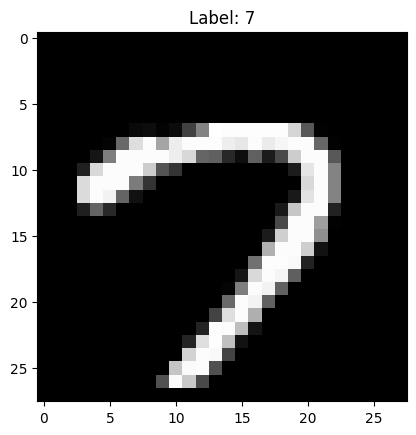

In [63]:
image = X_test.iloc[-2].values
image = image.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_test.iloc[-2]}")  # shows the label of the image
plt.show()

# Checking with test dataset.

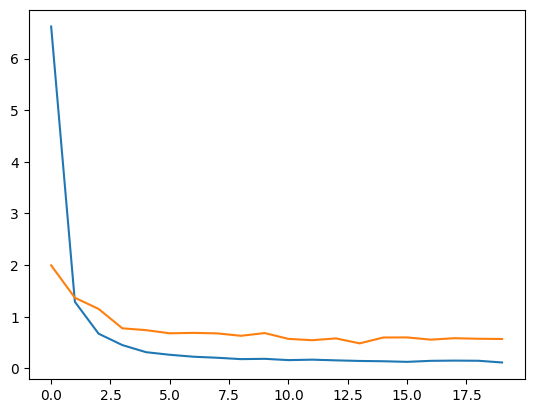

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

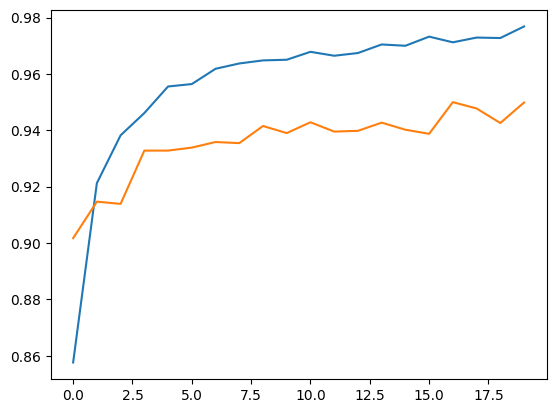

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

    
 ### Parameters in model.fit()

1.  **X\_train**:
    
    *   The input features for training. In your case, these are the images flattened into arrays of shape (784,).
        
2.  **y\_train**:
    
    *   The target labels for training. These are the class labels corresponding to each image in X\_train.
        
3.  **batch\_size=64**:
    
    *   The number of samples per gradient update. During training, the data is divided into batches of this size. For each batch, the model's weights are updated. A smaller batch size provides a noisier estimate of the gradient, while a larger batch size provides a more accurate estimate but uses more memory and can be slower.
        
4.  **epochs=20**:
    
    *   The number of times the entire training dataset is passed through the model. Each epoch consists of multiple iterations over the data (one iteration per batch). More epochs allow the model to learn more, but if too high, it can lead to overfitting.
        
5.  **verbose=1**:
    
    *   Controls the verbosity of the output during training.
        
        *   0: No output (silent mode).
            
        *   1: Progress bar and detailed logs.
            
        *   2: Only logs the epoch number and loss/metrics.
            
6.  **validation\_split=0.2**:
    
    *   Fraction of the training data to reserve for validation. This means that 20% of the training data will be used to evaluate the model's performance after each epoch, while the remaining 80% will be used for training. It helps in monitoring how well the model generalizes to unseen data during training.